In [1]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set()
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Evaluation metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

In [3]:
print(wine.shape)
wine[D].describe()
wine[D].head()

(6497, 13)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9

In [4]:
print(wine.shape)
wine[DLC].describe()
wine[DLC].head()

(6497, 13)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  color  
0      8.8        6    0.0  
1      9.5        6    0.0  
2     10.1        6    0.0  
3      9.9        6    0.0  
4      9.9        6    0.0

In [5]:
data = wine[DC]
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  color  
0      8.8    0.0  
1      9.5    0.0  
2     10.1    0.0  
3      9.9    0.0  
4      9.9    0.0

In [6]:
data.shape

(6497, 12)

## Pairplot without normalization

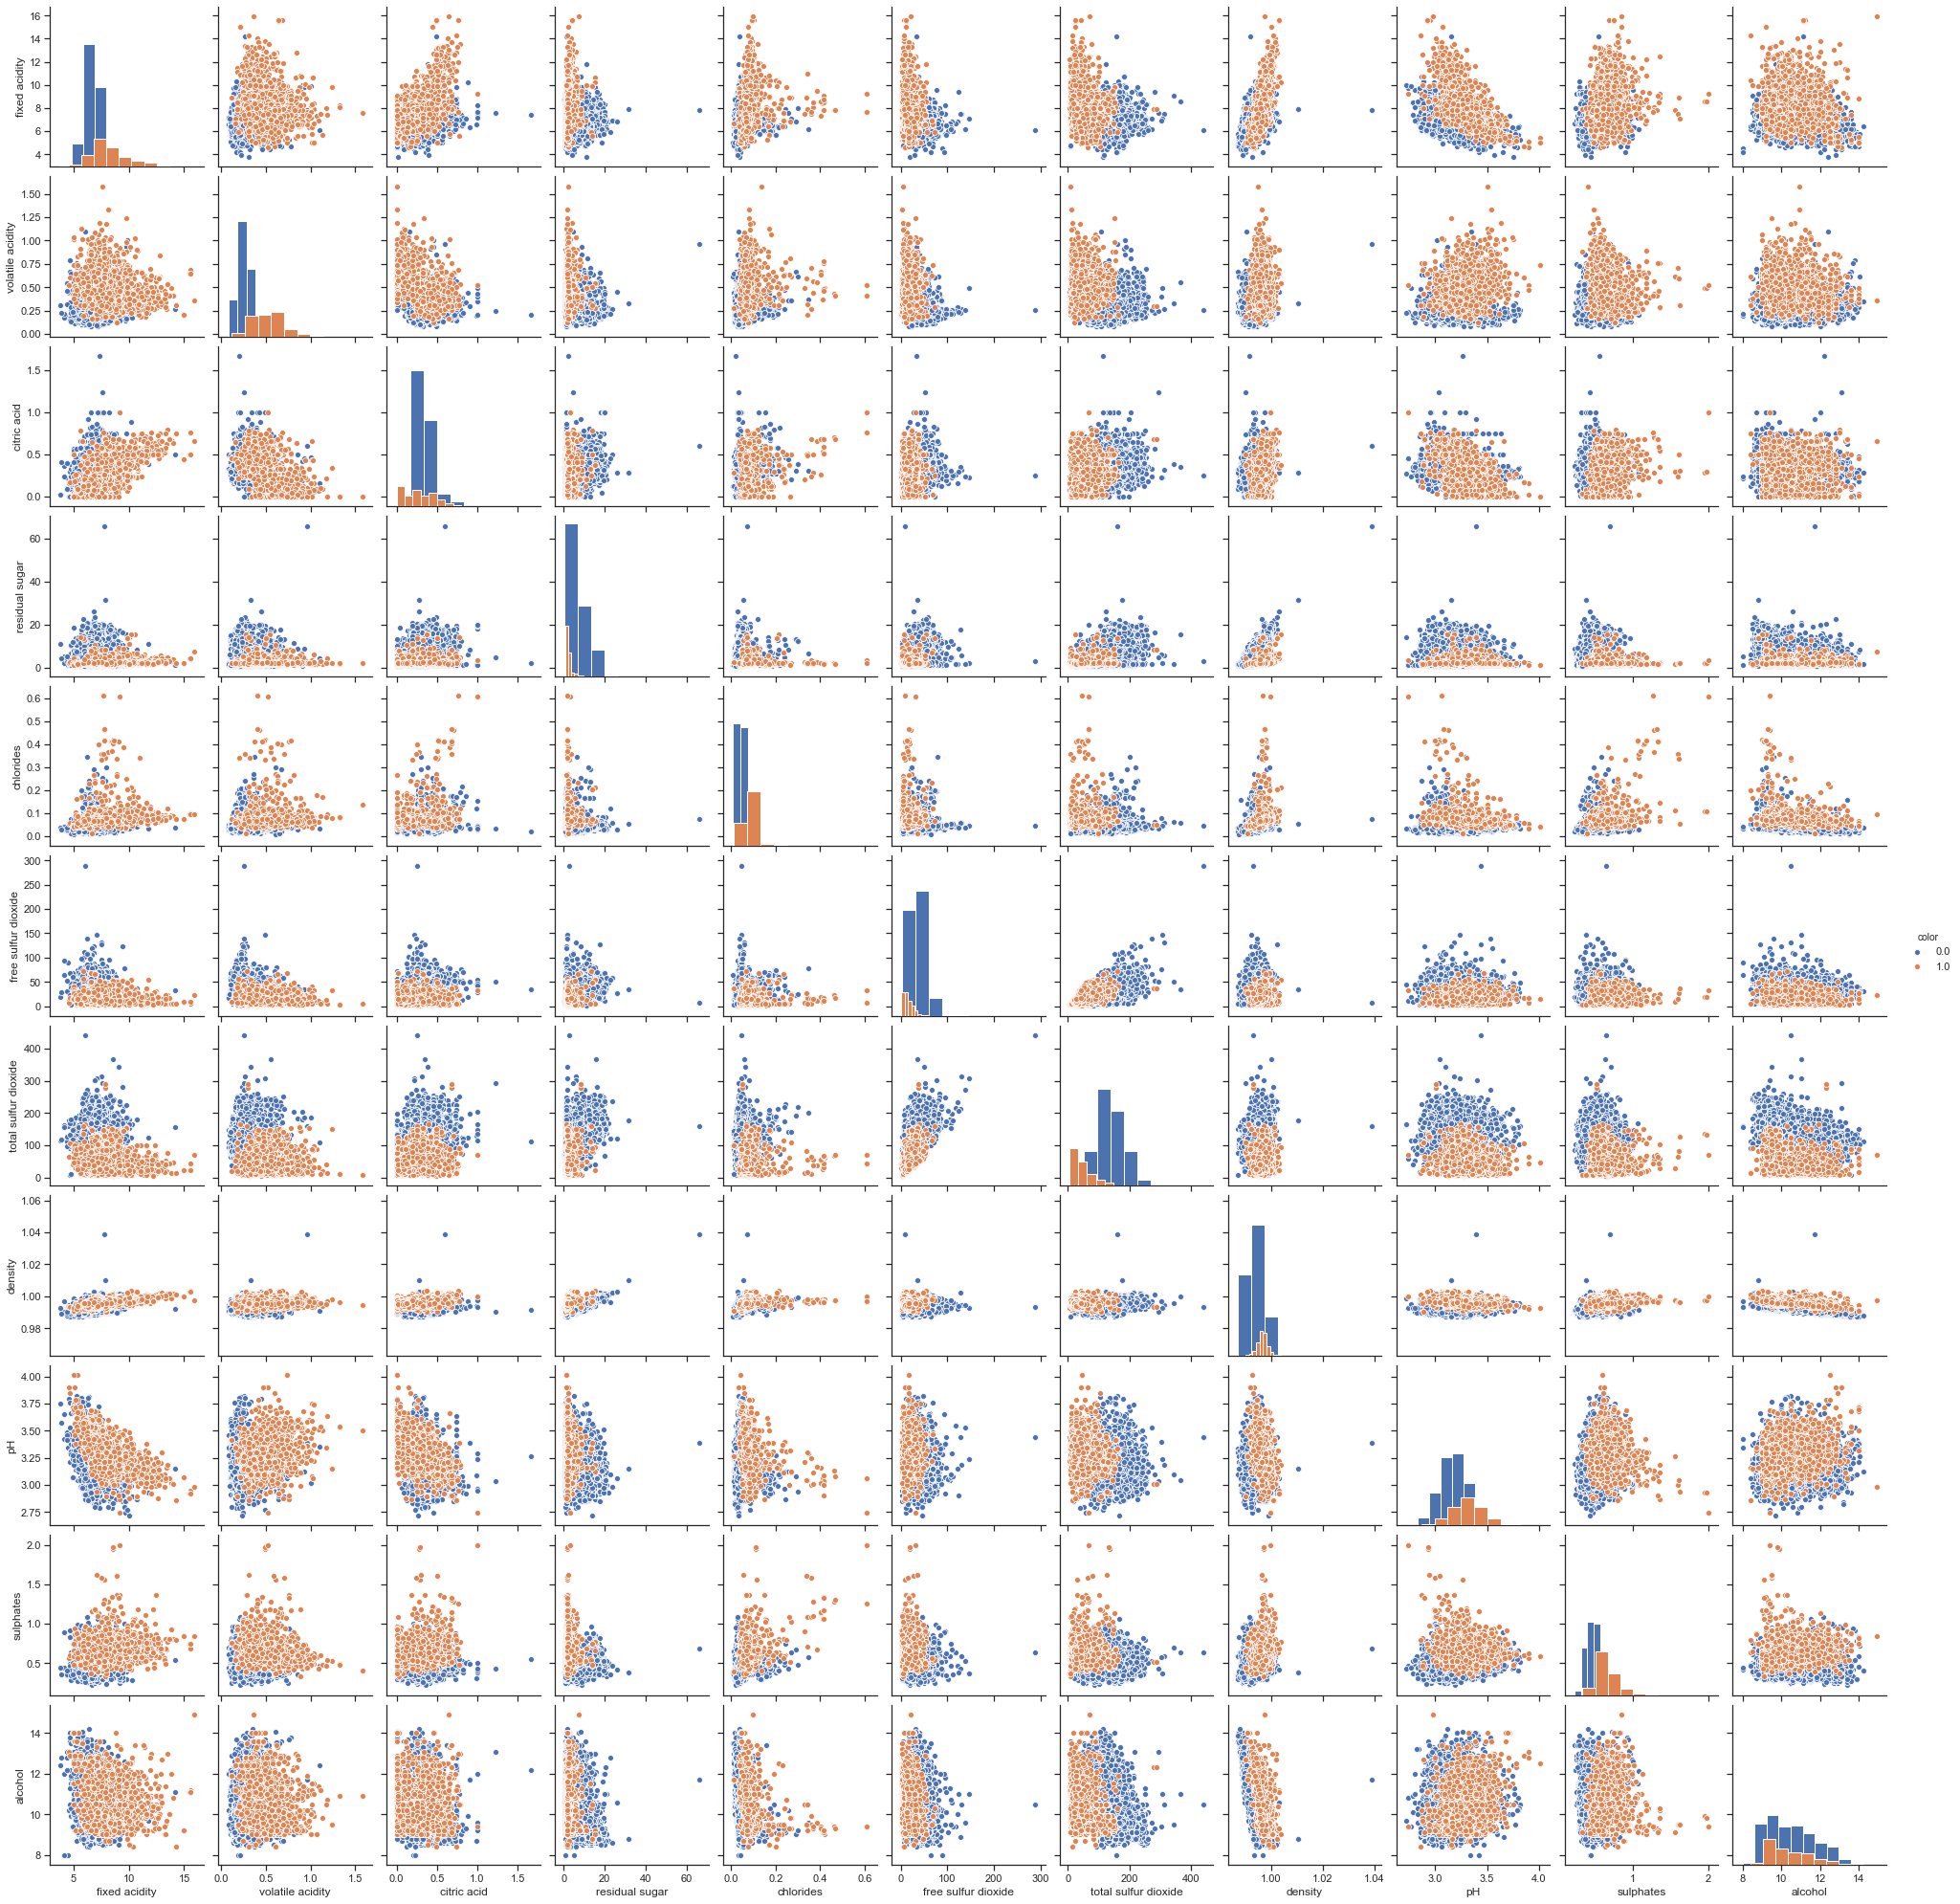

In [7]:
# Pair plot for the entire data without normalization and color as label
sns.pairplot(data=data,kind='scatter', hue = 'color', diag_kind='hist')
plt.show()

## Z-score Normalization of data 

In [8]:
# Zscore normalization of the entire data set
# Normalizing the data using zscore

data_norm = data.apply(zscore)

In [9]:
data_norm.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.166089         -0.423183     0.284686        3.206929  -0.314975   
1      -0.706073         -0.240949     0.147046       -0.807837  -0.200790   
2       0.682458         -0.362438     0.559966        0.306208  -0.172244   
3      -0.011808         -0.666161     0.009406        0.642523   0.056126   
4      -0.011808         -0.666161     0.009406        0.642523   0.056126   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.815565              0.959976  2.102214 -1.359049  -0.546178   
1            -0.931107              0.287618 -0.232332  0.506915  -0.277351   
2            -0.029599             -0.331660  0.134525  0.258120  -0.613385   
3             0.928254              1.243074  0.301278 -0.177272  -0.882212   
4             0.928254              1.243074  0.301278 -0.177272  -0.882212   

    alcohol     color  
0 -1.418558 -0.571367  
1 -0.831615 -0.571367  
2 -0.328521 -0.571367  
3 -0.496219 -0.571367  
4 -0.496219 -0.571367

In [10]:
data_norm.shape

(6497, 12)

## Pairplot with normalized data

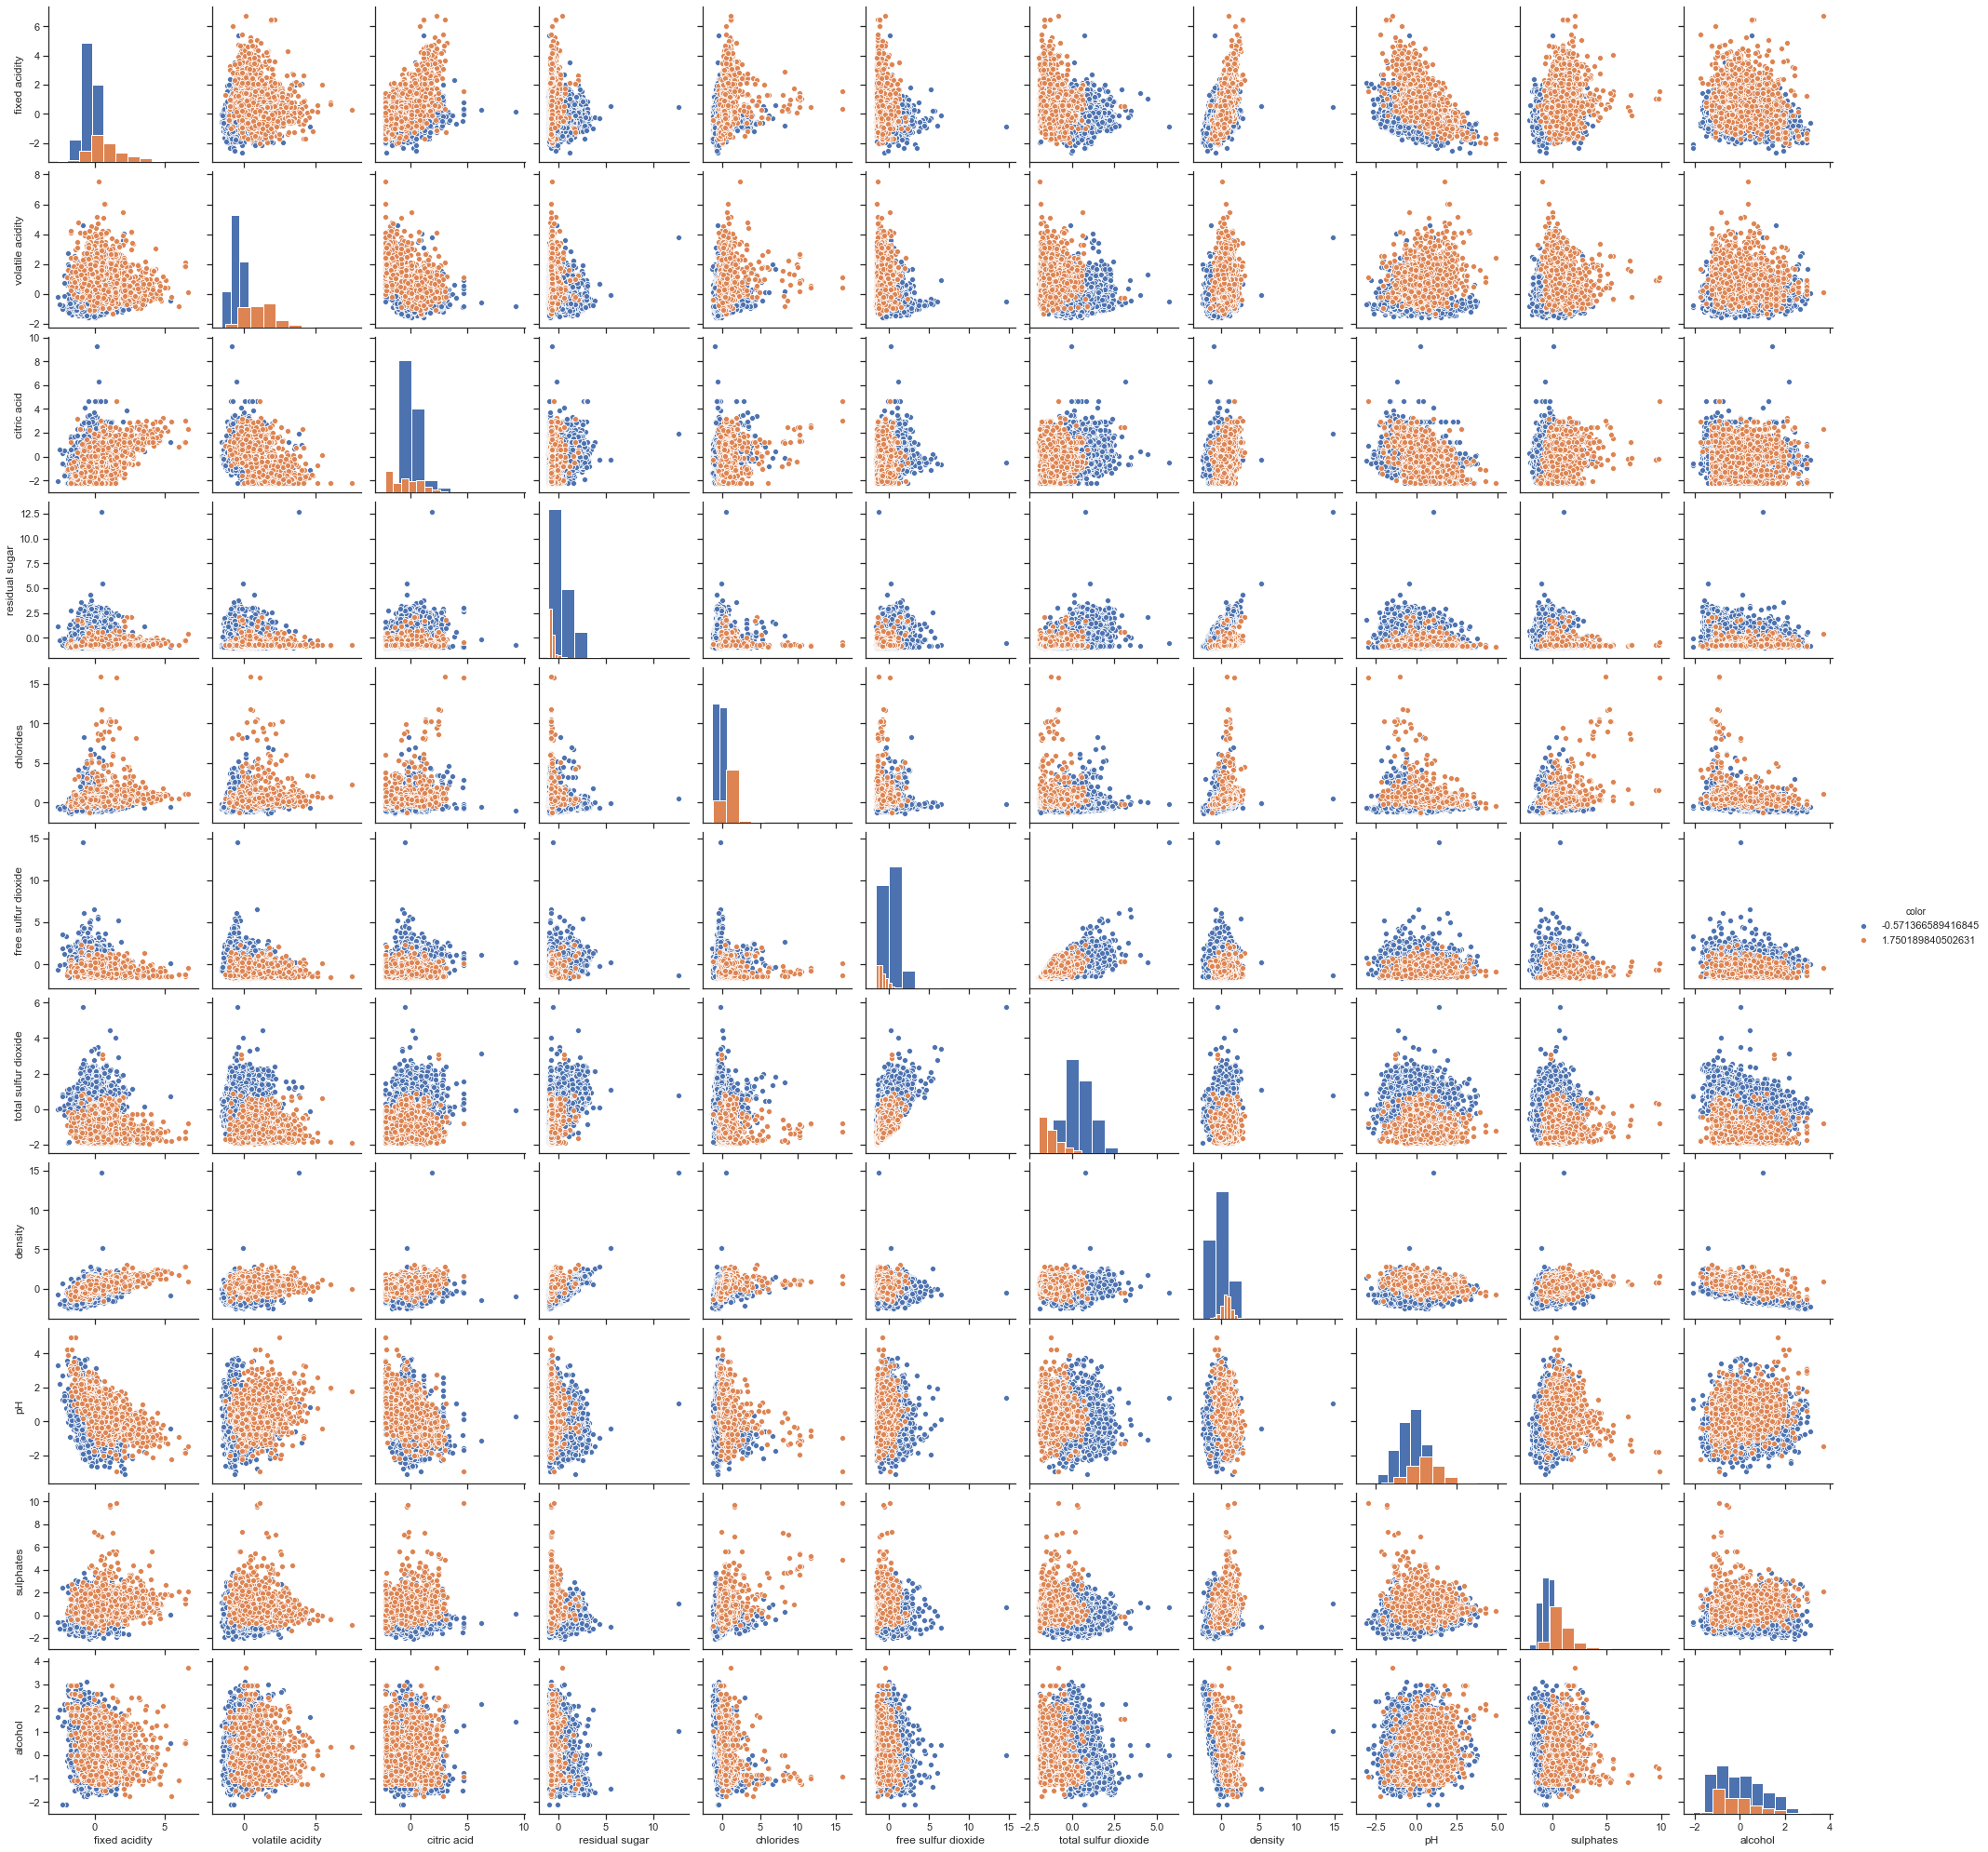

In [11]:
# Pair plot for the entire data with normalization and color as label
sns.pairplot(data=data_norm, kind='scatter', hue = 'color',diag_kind='hist')
plt.show()

## Analysing the pairplot differences with and without normalization

1. The very first obeservation we see in both the plots is the scale has been changed when the data is normalized.
2. Other than the scale we can observe that the plots are exactly the same.
3. In both the pairplots we can see that few of the features can distinguish the red wine and the white wine using the if conditions with respect to their scales. The features are citric acid and residual sugar, citric acid and free sulfur dioxide, free sulfur dioxide and total sulfur dioxide and finally density and alcohol.
4. After Normalization the scale of every feature is same
5. Z-score converts all the features to common scalewith average zero and standars deviation 1. After nprmalization we can observe that the relationship between the features is less effected by the ranges in the scale of all the features.

## Train/Test Split

In [12]:
# classify color of wine with all features
X = wine[D].values
y = np.ravel(wine[[C]])

ran = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran) 

In [13]:
X.shape

(6497, 11)

In [14]:
y.shape

(6497,)

In [15]:
X_train.shape

(5197, 11)

In [16]:
X_test.shape

(1300, 11)

In [17]:
y_train.shape

(5197,)

In [18]:
y_test.shape

(1300,)

## Normalization

In [19]:
#Feature scaling using z score normalization
scaling = StandardScaler()
X_train_scaled = scaling.fit_transform(X_train)
X_test_scaled = scaling.transform(X_test)

# Classification

In [20]:
n_neighborslist = list(range(1,50))
col_names=['uniform','manhattan','eucledian']
accarray = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray, columns=col_names)

# for uniform weight
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_scaled, y_train)
    y_pred = neigh.predict(X_test_scaled)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,col_names[0]] = accscore
    
# Distance based weight with manhattan distance
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',metric='manhattan')
    neigh.fit(X_train_scaled, y_train)
    y_pred = neigh.predict(X_test_scaled)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,col_names[1]] = accscore
    
# Distance based weight with eucledian distance
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',metric='euclidean')
    neigh.fit(X_train_scaled, y_train)
    y_pred = neigh.predict(X_test_scaled)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,col_names[2]] = accscore
acc.describe()
acc.head()

uniform  manhattan  eucledian
0  0.000000   0.000000   0.000000
1  0.993846   0.995385   0.993846
2  0.993846   0.995385   0.993846
3  0.995385   0.995385   0.996154
4  0.994615   0.996154   0.995385

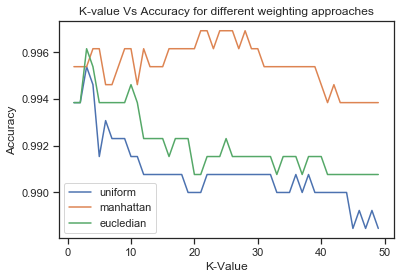

In [21]:
acc[1:].plot.line()
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.title('K-value Vs Accuracy for different weighting approaches')
plt.show()

## Feature Selection:

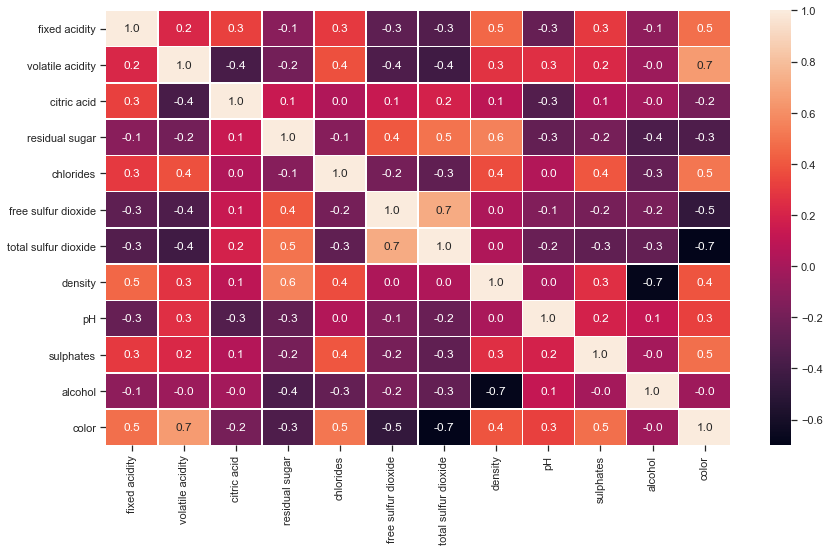

In [22]:
cmat = data.corr()
#correlation map
f,ax = plt.subplots(figsize=(14, 8))
sns.heatmap(cmat, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

##### From Correlation its clear that the features fixed acidity, chlorides and sulphates have same correlation values with respect to the label color

## Recursive feature elimination

In [23]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier

X_r = data.drop(['color'],axis=1)
y_r = data['color']

# Create the RFE object and rank each pixel
classifier = RandomForestClassifier()      
rfe = RFE(estimator=classifier, n_features_to_select=4, step=1)
rfe = rfe.fit(X_train, y_train)

# Create the RFE object and rank each pixel
classifier = RandomForestClassifier()      
rfe = RFE(estimator=classifier, n_features_to_select=4, step=1)
rfe = rfe.fit(X_train, y_train)

print('Chosen best 4 features by rfe:',X_r.columns[rfe.support_])

Chosen best 4 features by rfe: Index(['volatile acidity', 'chlorides', 'total sulfur dioxide', 'sulphates'], dtype='object')


In [24]:
# Selecting few important features from all the above analysis
featured_data = data[['volatile acidity', 'sulphates', 'chlorides','total sulfur dioxide', 'color']] 
featured_data.head()

volatile acidity  sulphates  chlorides  total sulfur dioxide  color
0              0.27       0.45      0.045                 170.0    0.0
1              0.30       0.49      0.049                 132.0    0.0
2              0.28       0.44      0.050                  97.0    0.0
3              0.23       0.40      0.058                 186.0    0.0
4              0.23       0.40      0.058                 186.0    0.0

In [25]:
featured_data.shape

(6497, 5)

In [26]:
Xf = featured_data.iloc[:,0:4]
yf = featured_data.iloc[:,4]

ran = 42
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(Xf, yf, test_size=0.2, random_state = ran) 

In [27]:
Xf.shape

(6497, 4)

In [28]:
yf.shape

(6497,)

In [29]:
X_train_f.shape

(5197, 4)

In [30]:
y_train_f.shape

(5197,)

In [31]:
y_test_f.shape

(1300,)

In [32]:
y_train_f.shape

(5197,)

In [33]:
#Feature scaling
scaling_f = StandardScaler()
X_train_f_scaled = scaling_f.fit_transform(X_train_f)
X_test_f_scaled = scaling_f.transform(X_test_f)

## Classification for selected features

In [34]:
n_neighborslist = list(range(1,60))
col_names=['uniform','manhattan','eucledian']
accarray_f = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc_f=pd.DataFrame(accarray_f, columns=col_names)

# for uniform weight
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_f_scaled, y_train_f)
    y_pred_f = neigh.predict(X_test_f_scaled)
    accscore_f = accuracy_score(y_test_f, y_pred_f)
    acc_f.at[k,col_names[0]] = accscore_f
    
# Distance based weight with manhattan distance
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',metric='manhattan')
    neigh.fit(X_train_f_scaled, y_train_f)
    y_pred_f = neigh.predict(X_test_f_scaled)
    accscore_f = accuracy_score(y_test_f, y_pred_f)
    acc_f.at[k,col_names[1]] = accscore_f
    
# Distance based weight with eucledian distance
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',metric='euclidean')
    neigh.fit(X_train_f_scaled, y_train_f)
    y_pred_f = neigh.predict(X_test_f_scaled)
    accscore_f = accuracy_score(y_test_f, y_pred_f)
    acc_f.at[k,col_names[2]] = accscore_f
acc_f.describe()
acc_f.head()

uniform  manhattan  eucledian
0  0.000000   0.000000   0.000000
1  0.988462   0.987692   0.988462
2  0.986923   0.987692   0.988462
3  0.987692   0.990769   0.988462
4  0.988462   0.989231   0.989231

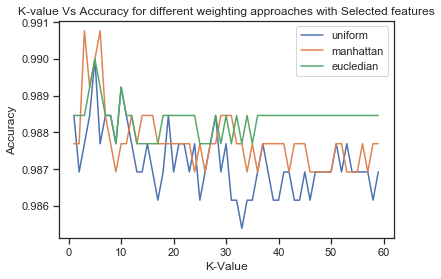

In [35]:
acc_f[1:].plot.line()
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.title('K-value Vs Accuracy for different weighting approaches with Selected features')
plt.show()

## Feature Extraction:

### PCA on Color label

In [36]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

n_neighborslist = list(range(1,50))
col_names=['uniform','manhattan','eucledian']
accarray_pca = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc_pca=pd.DataFrame(accarray_pca, columns=col_names)

# for uniform weight
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_pca, y_train)
    y_pred_pca = neigh.predict(X_test_pca)
    accscore_pca = accuracy_score(y_test, y_pred_pca)
    acc_pca.at[k,col_names[0]] = accscore_pca
    
# Distance based weight with manhattan distance
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',metric='manhattan')
    neigh.fit(X_train_pca, y_train)
    y_pred_pca = neigh.predict(X_test_pca)
    accscore_pca = accuracy_score(y_test, y_pred_pca)
    acc_pca.at[k,col_names[1]] = accscore_pca
    
# Distance based weight with eucledian distance
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',metric='euclidean')
    neigh.fit(X_train_pca, y_train)
    y_pred_pca = neigh.predict(X_test_pca)
    accscore_pca = accuracy_score(y_test, y_pred_pca)
    acc_pca.at[k,col_names[2]] = accscore_pca
acc_pca.describe()
acc_pca.head()

uniform  manhattan  eucledian
0  0.000000   0.000000   0.000000
1  0.950000   0.960769   0.950000
2  0.939231   0.960769   0.950000
3  0.935385   0.963077   0.949231
4  0.935385   0.961538   0.951538

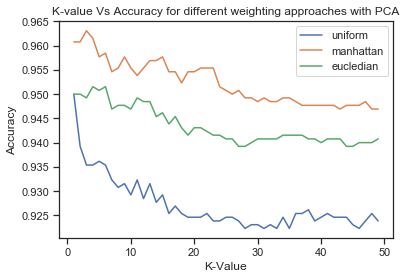

In [37]:
acc_pca[1:].plot.line()
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.title('K-value Vs Accuracy for different weighting approaches with PCA')
plt.show()

## LDA on quality label

In [38]:
dataset = wine[DL]
dataset.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [39]:
dataset['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

## Train/Test Split

In [40]:
# classify color of wine with all features
X1 = wine[D].values
y1 = np.ravel(wine[[L]])

ran = 42
X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(X1, y1, test_size=0.2, random_state = ran) 

## Normalization

In [41]:
#Feature scaling using z score normalization

scaling = StandardScaler()
X_train_q = scaling.fit_transform(X_train_q)
X_test_q = scaling.transform(X_test_q)

## Classification

## LDA on quality

In [42]:
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train_q, y_train_q)
X_test_lda = lda.transform(X_test_q)

In [43]:
n_neighborslist = list(range(1,50))
col_names=['uniform','manhattan','eucledian']
accarray_lda = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc_lda=pd.DataFrame(accarray_lda, columns=col_names)

# for uniform weight
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_lda, y_train_q)
    y_pred_lda = neigh.predict(X_test_lda)
    accscore_lda = accuracy_score(y_test_q, y_pred_lda)
    acc_lda.at[k,col_names[0]] = accscore_lda
    
# Distance based weight with manhattan distance
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',metric='manhattan')
    neigh.fit(X_train_lda, y_train_q)
    y_pred_lda = neigh.predict(X_test_lda)
    accscore_lda = accuracy_score(y_test_q, y_pred_lda)
    acc_lda.at[k,col_names[1]] = accscore_lda
    
# Distance based weight with eucledian distance
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',metric='euclidean')
    neigh.fit(X_train_lda, y_train_q)
    y_pred_lda = neigh.predict(X_test_lda)
    accscore_lda = accuracy_score(y_test_q, y_pred_lda)
    acc_lda.at[k,col_names[2]] = accscore_lda
acc_lda.describe()
acc_lda.head()

uniform  manhattan  eucledian
0  0.000000   0.000000   0.000000
1  0.636154   0.638462   0.636154
2  0.574615   0.638462   0.636154
3  0.553077   0.639231   0.646923
4  0.553077   0.654615   0.655385

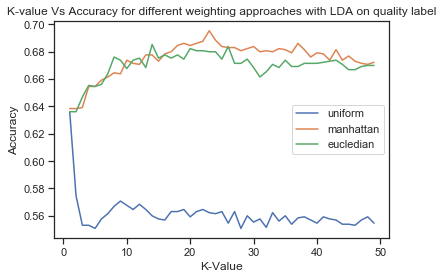

In [44]:
acc_lda[1:].plot.line()
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.title('K-value Vs Accuracy for different weighting approaches with LDA on quality label')
plt.show()

## PCA on quality

In [45]:
pca = PCA()
PrincipalComponents = pca.fit(X_train_q)
train_pca_q = pca.transform(X_train_q)
test_pca_q = pca.transform(X_test_q)

n_neighborslist = list(range(1,50))

col_names=['uniform', 'manhattan', 'euclidean']
accarray = np.zeros((len(n_neighborslist),3))

#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray, columns=col_names)

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(train_pca_q, y_train_q)
    y_pred = neigh.predict(test_pca_q)
    accscore = accuracy_score(y_test_q, y_pred)
    acc.at[k,col_names[0]] = accscore

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights = 'distance', metric='manhattan')
    neigh.fit(train_pca_q, y_train_q)
    y_pred = neigh.predict(test_pca_q)
    accscore = accuracy_score(y_test_q, y_pred)
    acc.at[k,col_names[1]] = accscore

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights = 'distance', metric='euclidean')
    neigh.fit(train_pca_q, y_train_q)
    y_pred = neigh.predict(test_pca_q)
    accscore = accuracy_score(y_test_q, y_pred)
    acc.at[k,col_names[2]] = accscore

 
acc.describe()
acc.head()

uniform  manhattan  euclidean
0  0.000000   0.000000   0.000000
1  0.628462   0.635385   0.628462
2  0.580000   0.635385   0.628462
3  0.564615   0.653846   0.659231
4  0.572308   0.660000   0.657692

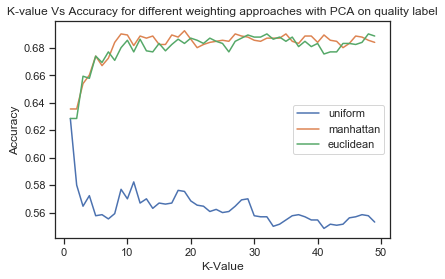

In [46]:
acc[1:].plot.line()
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.title('K-value Vs Accuracy for different weighting approaches with PCA on quality label')
plt.show()

## Analysis and Discussion on K plots vs accuracy with respect to different approaches

<b> k Plots General classification:</b> With the label as color and distance metric as manhattan with znorm maximum accuracy of about 99% on average is acheived for wide range of k values. Where as with respect to uniform as weight least accuracy is achieved.


<b>k Plots Selected Features:</b> With the label as color and distance metric as manhattan with znorm maximum accuracy of about 98.8% on average is acheived for wide range of k values with the selected 4 features. Where as with respect to uniform as weight least accuracy is achieved.Here it is to be obeserved that when we take aall the twelve featured we got an accuracy as 99% and taking 4 features leads us to around 98.8% which is almost the same resulting in less computation time.



<b> PCA on Color:</b>  With the label as color and distance metric as manhattan with znorm maximum accuracy of about 96% on average is acheived for wide range of k values with PCA. Where as with respect to uniform as weight least accuracy is achieved.

<b> PCA on quality:</b>  With the label as quality and distance metric as manhattan with znorm maximum accuracy of about 68% on average is acheived for wide range of k values with PCA. Where as with respect to uniform as weight least accuracy is achieved.


<b> LDA on quality:</b> With the label as quality and distance metric as  manhattan with znorm maximum accuracy of about 68% on average is acheived for wide range of k values. Where as with respect to uniform as weight least accuracy is achieved.

<b> Comparing both PCA and LDA on quality:</b> Both the PCA and LDA performed with amlost similar accuracy. eights with manhattan with znorm gave best accuracy and uniform fave the least accurach in comparision.

<b>PCA Vs LDA:</b> PCA performed much better in case of color as label. For quality both pca and lda perfromed almost similarly. It can be seen that normalization has an impart on the performance of both pca and lda.

<b>Overall the manhattan with znorm resulted in best accuracy and weights as uniform resulted  in the least accuracy.</b>

## PCA and LDA on the entire data 

## PCA

In [47]:
data_scaler = StandardScaler()
data_scaler.fit(data)

scaled_data_pca = data_scaler.transform(data)

In [48]:
scaled_data_pca

array([[-0.16608919, -0.42318303,  0.28468605, ..., -0.54617826,
        -1.41855821, -0.57136659],
       [-0.70607349, -0.24094936,  0.14704613, ..., -0.27735097,
        -0.83161516, -0.57136659],
       [ 0.68245757, -0.36243847,  0.55996589, ..., -0.61338508,
        -0.32852111, -0.57136659],
       ...,
       [-0.70607349,  1.03468634, -1.29817304, ...,  1.47002637,
         0.42611996,  1.75018984],
       [-1.01463595,  1.85473786, -1.366993  , ...,  1.20119908,
        -0.2446721 ,  1.75018984],
       [-0.93749534, -0.1802048 ,  1.04170561, ...,  0.86516498,
         0.42611996,  1.75018984]])

In [49]:
pca = PCA(n_components=2)

pca.fit(scaled_data_pca)
x_pca_data = pca.transform(scaled_data_pca)

In [50]:
scaled_data_pca.shape

(6497, 12)

In [51]:
x_pca_data.shape

(6497, 2)

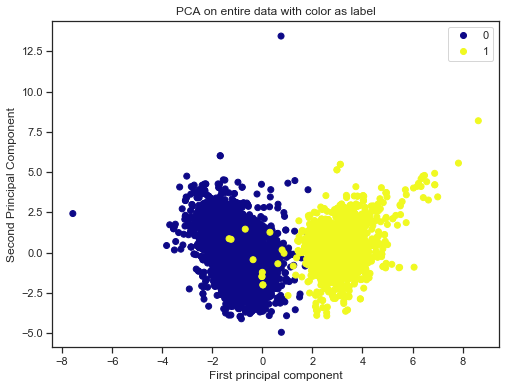

In [52]:
# Plotting pca for the entire data with color as label
plt.figure(figsize=(8,6))
classes=['0','1']
scatter = plt.scatter(x_pca_data[:,0],x_pca_data[:,1],c=data['color'],cmap='plasma')
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('PCA on entire data with color as label')
plt.show()

## LDA on quality

In [53]:
data_scaler_lda = StandardScaler()
data_scaler_lda.fit(dataset)

scaled_data_lda = data_scaler_lda.transform(dataset)

In [54]:
X_q = dataset.drop(['quality'],axis=1)
y_q = dataset['quality']
ran = 42

In [55]:
lda_data = LinearDiscriminantAnalysis(n_components=2)

lda_q = lda_data.fit(X_q,y_q).transform(X_q)


In [56]:
lda_q.shape

(6497, 2)

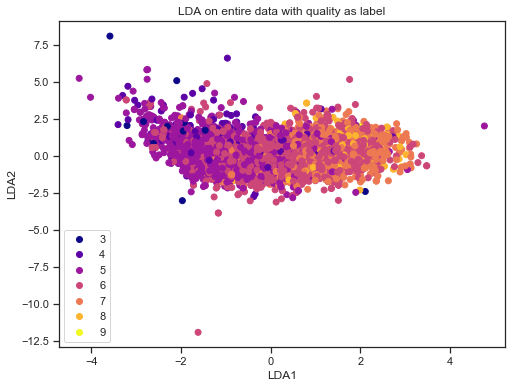

In [57]:
# Plotting lda for the entire data with quality as label
plt.figure(figsize=(8,6))
classes=['3','4','5','6','7','8','9']
scatter = plt.scatter(lda_q[:,0],lda_q[:,1],c=y_q,cmap='plasma')
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.title('LDA on entire data with quality as label')
plt.show()

## PCA on quality

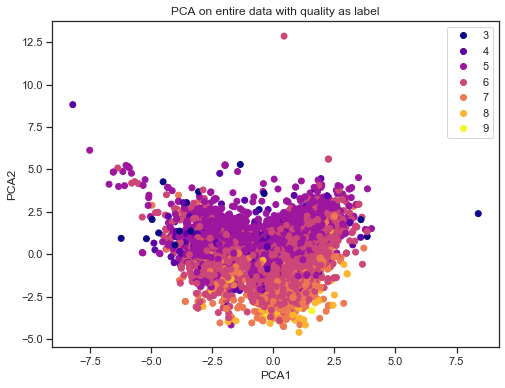

In [58]:
pca_qu = PCA(n_components=2)

pca.fit(scaled_data_lda)
x_pca_q = pca.transform(scaled_data_lda)

# Plotting pca for the entire data with quality as label
plt.figure(figsize=(8,6))
classes=['3','4','5','6','7','8','9']
scatter = plt.scatter(x_pca_q[:,0],x_pca_q[:,1],c=y_q,cmap='plasma')
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA on entire data with quality as label')
plt.show()

## Comparision of the PCA and LDA plots  with respect to the pairplots

<b>PCA on color: </b> Using PCA we are clearly able to classifiy the white wine and red wine except very few overlapings overall.

<b>PCA on quality: </b> Using PCA with quality as we are able to classifiy the quality much better especially 5's and 6's in comparision with LDA. But overall there are overlappings

<b>LDA: </b> In LDA with quality as label we cannot clearly classify the quality label ,it can be obesrved clearly that there are huge overlappings overall.

<b>Comparision with respect to pairplots: </b> Both PCA and LDA are able to classify much better in comparision to the pairplots. Especially PCA has very less overlappings and it made much easier to classify the color of wine than pairplots.

<b> Overall PCA with color as label did the better job at classifing the wine color <b>

In [59]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import math
import pydot
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from time import time

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [60]:
# importing the dataset
df = pd.read_csv("DataB.csv")

In [61]:
df.head()

Unnamed: 0  fea.1  fea.2  fea.3  fea.4  fea.5  fea.6  fea.7  fea.8  fea.9  \
0           1      4      4      3      0      0      4      2      1      4   
1           2      5      1      4      3      1      3      5      1      4   
2           3      1      3      0      3      1      1      0      1      0   
3           4      5      3      2      3      5      2      2      0      4   
4           5      3      5      3      3      0      4      1      1      4   

   ...  fea.776  fea.777  fea.778  fea.779  fea.780  fea.781  fea.782  \
0  ...        1        3        0        4        2        1        1   
1  ...        1        1        3        3        1        3        3   
2  ...        3        0        2        4        2        2        1   
3  ...        5        4        5        1        4        4        2   
4  ...        1        3        3        3        1        2        4   

   fea.783  fea.784  gnd  
0        4        5    0  
1        5        4    0  
2        2        4    0  
3        4        4    0  
4        1        1    0  

[5 rows x 786 columns]

In [62]:
data = df.drop(df.columns[[0]], axis=1)

In [63]:
data.head()

fea.1  fea.2  fea.3  fea.4  fea.5  fea.6  fea.7  fea.8  fea.9  fea.10  ...  \
0      4      4      3      0      0      4      2      1      4       1  ...   
1      5      1      4      3      1      3      5      1      4       4  ...   
2      1      3      0      3      1      1      0      1      0       2  ...   
3      5      3      2      3      5      2      2      0      4       5  ...   
4      3      5      3      3      0      4      1      1      4       3  ...   

   fea.776  fea.777  fea.778  fea.779  fea.780  fea.781  fea.782  fea.783  \
0        1        3        0        4        2        1        1        4   
1        1        1        3        3        1        3        3        5   
2        3        0        2        4        2        2        1        2   
3        5        4        5        1        4        4        2        4   
4        1        3        3        3        1        2        4        1   

   fea.784  gnd  
0        5    0  
1        4    0  
2        4    0  
3        4    0  
4        1    0  

[5 rows x 785 columns]

In [64]:
data.shape

(2066, 785)

In [65]:
X_label = data.drop(['gnd'],axis=1)
y_label = data['gnd']
ran = 42

In [66]:
X_label.shape

(2066, 784)

In [67]:
y_label.shape

(2066,)

In [68]:
X_std = StandardScaler().fit_transform(X_label)

# Principal Component Analysis (PCA)

In [69]:
# Eigendecomposition on the covariance matrix
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.00197863  0.00493308 -0.00037529 ...  0.00088801 -0.00062295
  -0.00157864]
 [-0.00151307 -0.00640373  0.00258725 ...  0.00427817 -0.00837347
   0.0063992 ]
 [ 0.00049178 -0.00156563 -0.00372451 ...  0.00288963  0.00683485
  -0.00181313]
 ...
 [ 0.0001125   0.00300533 -0.00335936 ... -0.00488054 -0.00039547
   0.00083265]
 [ 0.00132315  0.00947149  0.00553066 ... -0.01563742 -0.01070597
   0.01537859]
 [-0.00591181  0.00287621  0.00624184 ... -0.00172455 -0.00246361
   0.00327846]]

Eigenvalues 
[5.17773194e+01 2.88008646e+01 2.67709105e+01 2.39303462e+01
 2.15750394e+01 1.58935251e+01 1.38619413e+01 1.19120888e+01
 1.06614183e+01 9.82358285e+00 9.11333621e+00 8.28795842e+00
 7.47022078e+00 7.18685689e+00 7.01821733e+00 6.72923900e+00
 6.17171361e+00 6.03035494e+00 5.97218819e+00 5.74588510e+00
 5.56641979e+00 5.34085526e+00 5.30999748e+00 5.07244463e+00
 4.90219996e+00 4.74032764e+00 4.46040954e+00 4.43875834e+00
 4.37522974e+00 4.24991493e+00 4.19736144e+00 4.13191

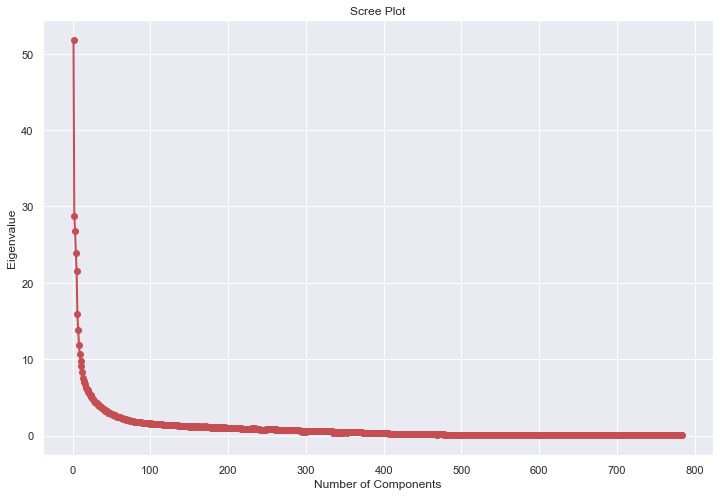

In [70]:
#Plotting the scree plot
num_of_components = 784
fig = plt.figure(figsize=(12,8))
noc = np.arange(num_of_components) + 1
plt.plot(noc, eig_vals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.show()

## Analysing which cut-off is good from the scree plot

<b>It is clearly evident that the values above the elbow will be sufficient to determine the data with out losing much informartion from the original data and the values below the elbow can be eliminated. From the above scree plot between 10 to 12 principal components will required. But we cant predict it exactly untill we calculate the explained varience.</b>

In [71]:
pca = PCA()
X_r = pca.fit(X_label).transform(X_label)

In [72]:
print('\nEigenvalues \n%s' %pca.explained_variance_)
print('Eigenvectors \n%s' %pca.components_)


Eigenvalues 
[4.67242207e+05 2.78894146e+05 2.13480284e+05 2.05514154e+05
 1.71638869e+05 1.29473256e+05 1.13282522e+05 9.13665833e+04
 8.81948304e+04 7.26695964e+04 6.47973043e+04 5.91614589e+04
 5.71810362e+04 5.15388208e+04 4.71162983e+04 4.30116981e+04
 4.01681360e+04 3.92327232e+04 3.81662137e+04 3.44883896e+04
 3.25474987e+04 3.08116460e+04 2.87269206e+04 2.77117300e+04
 2.66864459e+04 2.59429468e+04 2.44575328e+04 2.37064782e+04
 2.32238894e+04 2.19475845e+04 2.14949943e+04 1.99553743e+04
 1.95307071e+04 1.77691867e+04 1.67857005e+04 1.63009352e+04
 1.61692889e+04 1.55764739e+04 1.45129452e+04 1.41356650e+04
 1.37490819e+04 1.31545707e+04 1.23464386e+04 1.19231480e+04
 1.17660533e+04 1.16006832e+04 1.13650854e+04 1.12916028e+04
 1.05749096e+04 1.00068073e+04 9.88224042e+03 9.42109813e+03
 9.06882290e+03 8.99328094e+03 8.78820190e+03 8.58885957e+03
 8.27499662e+03 7.83097385e+03 7.72571780e+03 7.42459108e+03
 7.14859947e+03 7.04846654e+03 6.86439480e+03 6.72662421e+03
 6.4792536

## 2. Scatter plot of the projected data with the top 20 eigenvalues

In [73]:
# PCA
pca = PCA(n_components=20,random_state=42)
pca_transformed = pca.fit_transform(X_std)
pca_transformed.shape

(2066, 20)

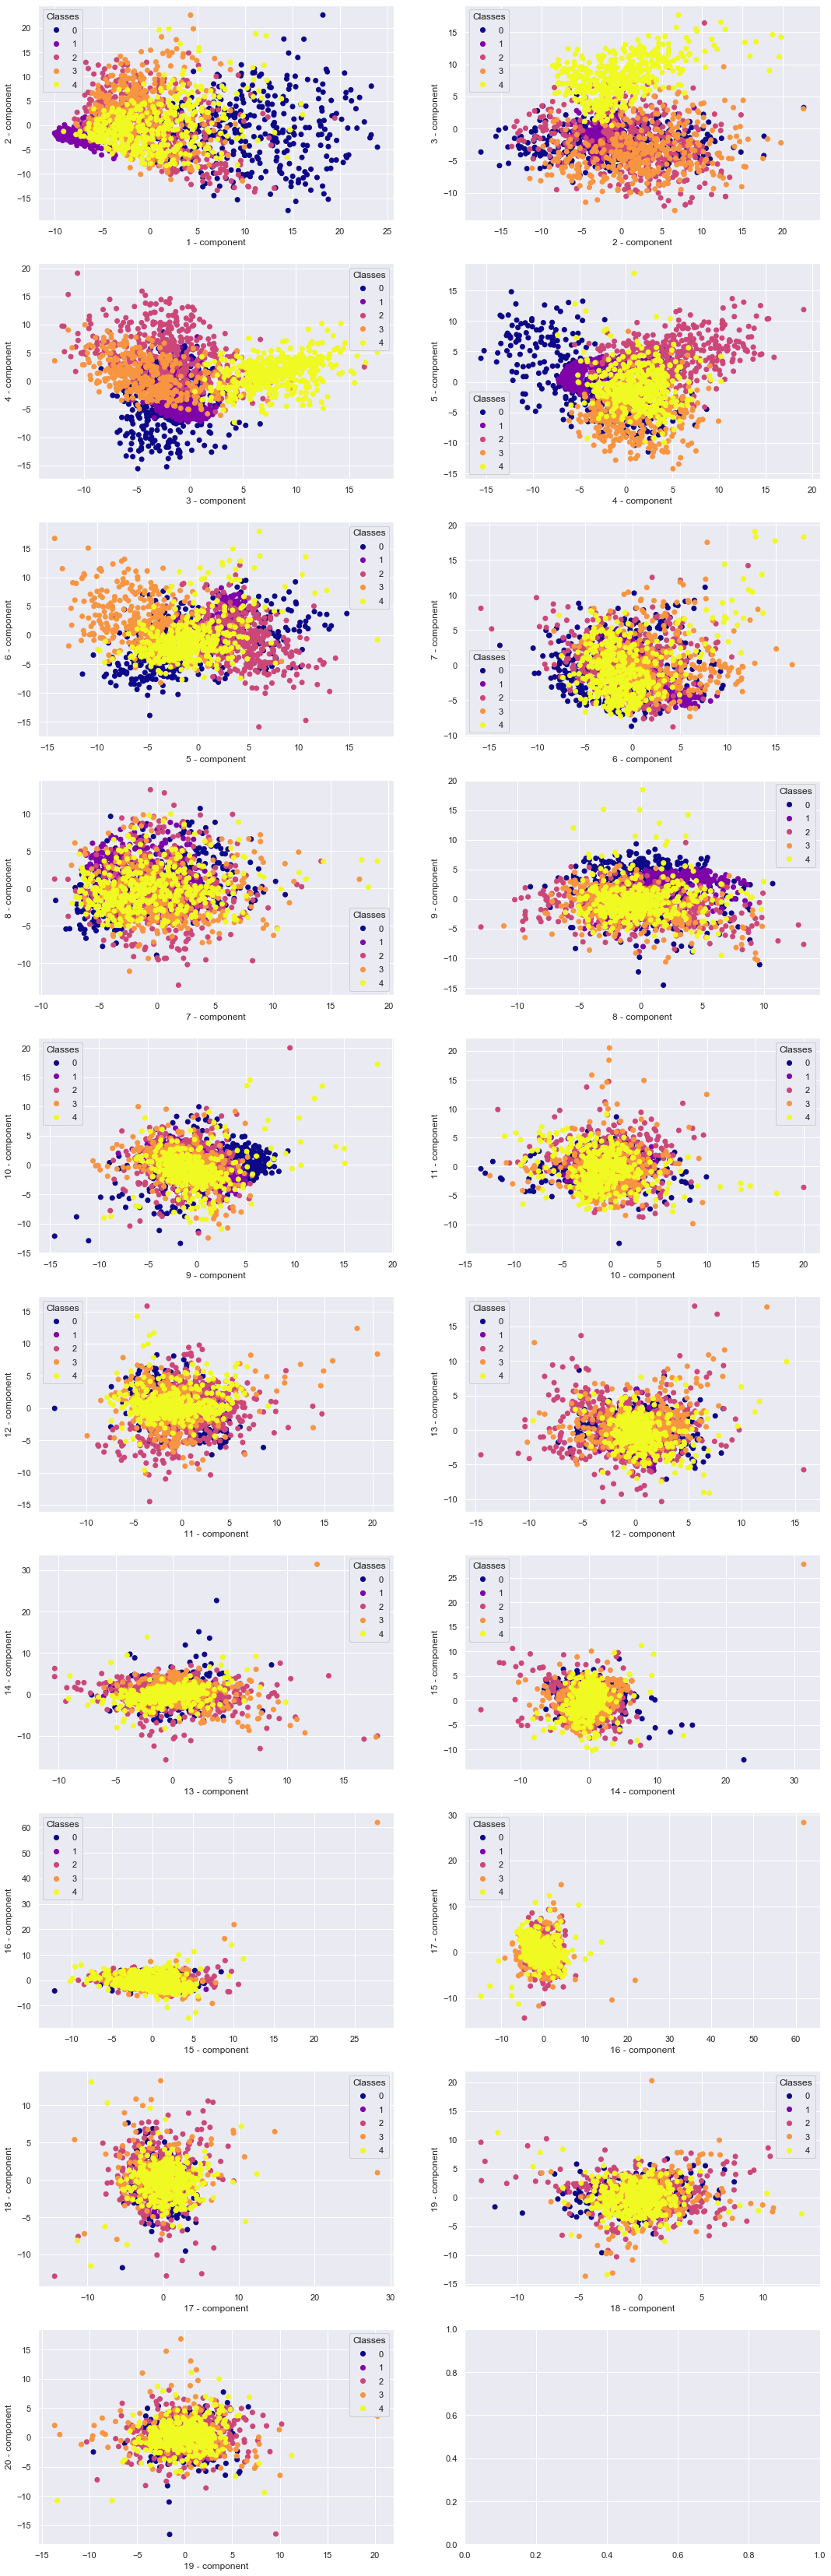

In [74]:

# Scatter plot of the projected data with top 20 eigen values
fig , axs = plt.subplots(10,2, figsize=(18,60))

cnt = 0
flg = False
for row in range(0,10):
    for column in range(0,2):
        scatter = axs[row,column].scatter(pca_transformed[:,cnt],pca_transformed[:,cnt+1], c = y_label, cmap='plasma')
        legend = axs[row,column].legend(*scatter.legend_elements(prop = 'colors'),loc = "best", title = 'Classes')
        axs[row,column].add_artist(legend)
        axs[row,column].set_xlabel((str(cnt+1) + ' - component'))
        axs[row,column].set_ylabel((str(cnt+2) + ' - component'))
        cnt +=1
        if(cnt == 19):
            flg = True
            break;
            
        if(flg):
            break;
         

### Analysis compared to the previous scree plot.

From the scree plot we came to the conclusion that around 10 to 12 principal components are required but we are not sure about it because we dont know theexact varience. But looking the above plots PCA1 Vs PCA2 and PCA 2 Vs PCA3 perform better classification compared to other components. Only two componets are sufficient for the given data.As we move further the plot between PCA3 Vs PCA4 and so on untill PCA19 Vs PCA20 as the number of dimensions increases the data points of different classes overlap heavily with each other and we cannot clearly distinguish between the classes. Finally comparing both scree plot and the subplot we can confirm that only two components are sufficient to classify the data for the given data set.

### 3. Plot two 2-dimensional representations of the data points based on the first vs second principal components and 5th vs 6th

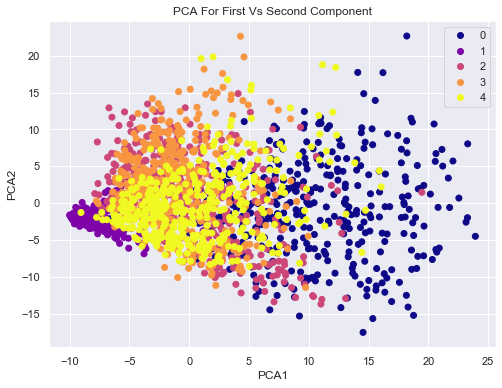

In [75]:
# Scatter plot for PCA1 VS PCA2
plt.figure(figsize=(8,6))
classes=['0','1','2','3','4']
scatter = plt.scatter(pca_transformed[:,0],pca_transformed[:,1],c=y_label,cmap='plasma')
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA For First Vs Second Component')
plt.show()

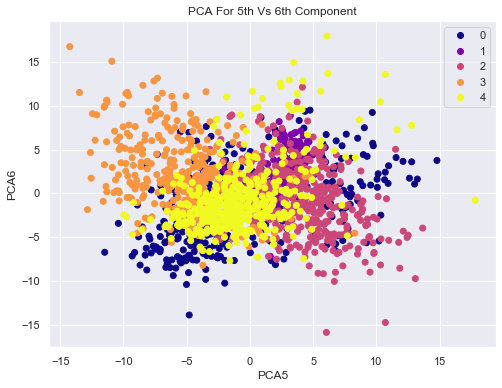

In [76]:
# Scatter plot for PCA5 VS PCA6
plt.figure(figsize=(8,6))
classes=['0','1','2','3','4']
scatter = plt.scatter(pca_transformed[:,4],pca_transformed[:,5],c=y_label,cmap='plasma')
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.xlabel('PCA5')
plt.ylabel('PCA6')
plt.title('PCA For 5th Vs 6th Component')
plt.show()

## Analysis of the results and comparision between the two plots

In PCA1 Vs PCA2 0's,1's and 4's can be classified and 2's an 3's are a bit overlapped where as in PCA5 Vs PCA6 except for the classes 3 and 4 all other data points are heavily overlapped. From the above two plots we can conclude that as the number of components increases we will lose most of the information from the original data and as a result we can see that there are huge overlappings.Overall PCA1 Vs PCA2 performed much better than PCA5 Vs PCA6

# 4. Implementation of PCA and dual PCA with singular value decomposition.

## PCA with SVD

In [77]:
import timeit

#Centralised matrix
X_mean = X_std.mean(axis=0)
X_cent = X_std - X_mean
X_cent = np.matrix(X_cent.T)

#PCA 
def PCA(X_cent):
    start = timeit.default_timer()
    U_i = np.matmul(X_cent, X_cent.T)
    U_eigen_val,U_eigen_vec = np.linalg.eigh(U_i)
    U_eigen_val_flip = np.flip(U_eigen_val)
    U_eigen_vec_flip = np.flip(U_eigen_vec,axis=1)
    U = U_eigen_vec_flip[:,0:2]
    pca_y = np.matmul(U.T, X_cent)
    stop = timeit.default_timer()
    pca_time = stop - start
    return pca_y, U_eigen_val_flip,pca_time

# Sigma Calculation
def sigma(U_eigen_val_flip):
    lambda_sq = np.sqrt(U_eigen_val_flip[0:2])
    sigma = np.diag(lambda_sq)
    return sigma

pca,eigenval,pca_time = PCA(X_cent)
sigma = sigma(eigenval)
print(' PCA Exectution Time: ', pca_time)

 PCA Exectution Time:  0.08643541799999355


## DualPCA with SVD

In [78]:
#Dual PCA
def DualPCA(sigma):
    start_dual_pca = timeit.default_timer()
    V_i = np.matmul(X_cent.T,X_cent)
    V_eigen_val,V_eigen_vec = np.linalg.eigh(V_i)
    V_eigen_val_flip = np.flip(V_eigen_val)
    V_eigen_vec_flip = np.flip(V_eigen_vec,axis=1)
    V = V_eigen_vec_flip[:,0:2]
    dual_pca = np.dot(sigma,V.T)
    stop_dual_pca = timeit.default_timer()
    dual_pca_time = stop_dual_pca - start_dual_pca
    return dual_pca,dual_pca_time

dual_pca,dual_pca_time = DualPCA(sigma)
print(' Dual PCA Exectution Time: ', dual_pca_time)

 Dual PCA Exectution Time:  0.5511655979999972


## Analysis of PCA and Dual PCA



<b>Comparing both PCA and Dual PCA , Dual PCA took more execution time compared to the PCA. PCA worked better with respect to the execution time.<b>

# 2.3 Fisher Discriminant Analysis (FDA)

## 2.3.1 Practical Questions

## 1. LDA

In [79]:
X_label.shape

(2066, 784)

In [80]:
y_label.shape

(2066,)

In [81]:
lda_data = LinearDiscriminantAnalysis(n_components=4)
lda = lda_data.fit(X_label,y_label).transform(X_label)

In [82]:
lda.shape

(2066, 4)

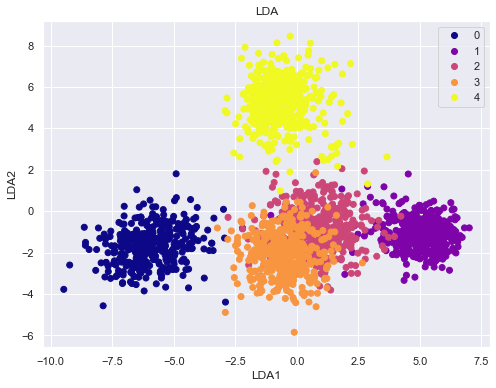

In [83]:
# Scatter plot for LDA1 VS LDA2
plt.figure(figsize=(8,6))
classes=['0','1','2','3','4']
scatter = plt.scatter(lda[:,0],lda[:,1],c=y_label,cmap='plasma')
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.title('LDA')
plt.show()

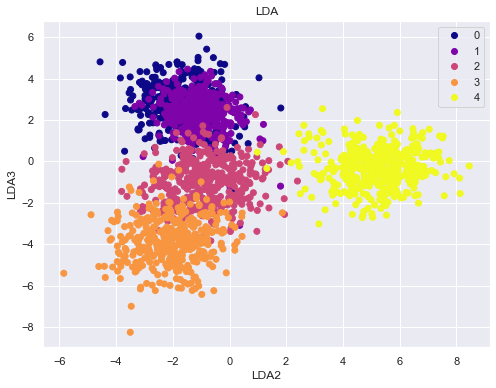

In [84]:
# Scatter plot for LDA2 VS LDA3
plt.figure(figsize=(8,6))
classes=['0','1','2','3','4']
scatter = plt.scatter(lda[:,1],lda[:,2],c=y_label,cmap='plasma')
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.xlabel('LDA2')
plt.ylabel('LDA3')
plt.title('LDA')
plt.show()

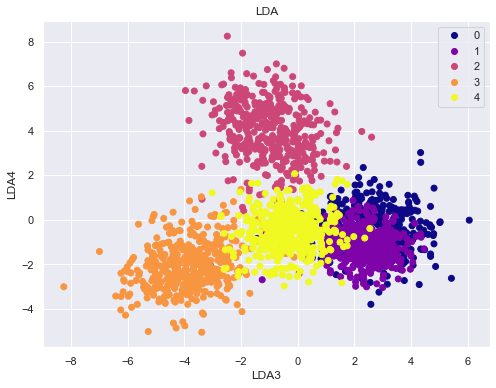

In [85]:
# Scatter plot for LDA3 VS LDA4
plt.figure(figsize=(8,6))
classes=['0','1','2','3','4']
plt.scatter(lda[:,2],lda[:,3],c=y_label,cmap='plasma')
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.xlabel('LDA3')
plt.ylabel('LDA4')
plt.title('LDA')
plt.show()

## Analysis of the results obtained by performing LDA

<b>LDA1 vs LDA2:</b> In LDA1 vs LDA2 almost all the classes are well seperated except very few overlappings

<b>LDA2 vs LDA3:</b> In LDA2 vs LDA3 classes 2,3,4 are well sperable but there is a huge overlapping of classes 0 and1

<b>LDA3 vs LDA4:</b>In LDA3 vs LDA4 classes 2,3,4 are well sperable but there is a huge overlapping of classes 0 and1

<b>Overall:</b> Over all from all the above components LDA1 vs LDA2 performed much better where we can classify all the classes with very very few overlappings.

# 2. Comparing the results of  LDA with the results obtained by using PCA

Comparing the results of the LDA and PCA it is very clear that LDA performed much better than PCA for the given dataset. In LDA we are able to classify all the classes very clearly with less overlapping where as in PCA there are more overlappigs compared to PCA and the data is not that very well seperated in comparision with LDA.

LDA captures the direction of the instances that fall apart and close to each other in one class where as pca captures in the direction of the data having maximum variance and it unsupervised , so it dosent cares abore the classes it cares about the varience and hence pca did not perform better at classifying the classes

# Question 3: Nonlinear Dimensionality Reduction

In [86]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set()
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import TSNE
from time import time

#Evaluation metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [87]:
# importing the dataset
df = pd.read_csv("DataB.csv")

In [88]:
df.head()

Unnamed: 0  fea.1  fea.2  fea.3  fea.4  fea.5  fea.6  fea.7  fea.8  fea.9  \
0           1      4      4      3      0      0      4      2      1      4   
1           2      5      1      4      3      1      3      5      1      4   
2           3      1      3      0      3      1      1      0      1      0   
3           4      5      3      2      3      5      2      2      0      4   
4           5      3      5      3      3      0      4      1      1      4   

   ...  fea.776  fea.777  fea.778  fea.779  fea.780  fea.781  fea.782  \
0  ...        1        3        0        4        2        1        1   
1  ...        1        1        3        3        1        3        3   
2  ...        3        0        2        4        2        2        1   
3  ...        5        4        5        1        4        4        2   
4  ...        1        3        3        3        1        2        4   

   fea.783  fea.784  gnd  
0        4        5    0  
1        5        4    0  
2        2        4    0  
3        4        4    0  
4        1        1    0  

[5 rows x 786 columns]

In [89]:
data = df.drop(df.columns[[0]], axis=1)

In [90]:
data.shape

(2066, 785)

# Kernal PCA

In [106]:
# kernal PCA
import timeit
kpca = KernelPCA(n_components=2, kernel='rbf', random_state=42)
kpca_transformed = kpca.fit_transform(data)
kpca_transformed.shape

(2066, 2)

Time:  0.03414922600001091


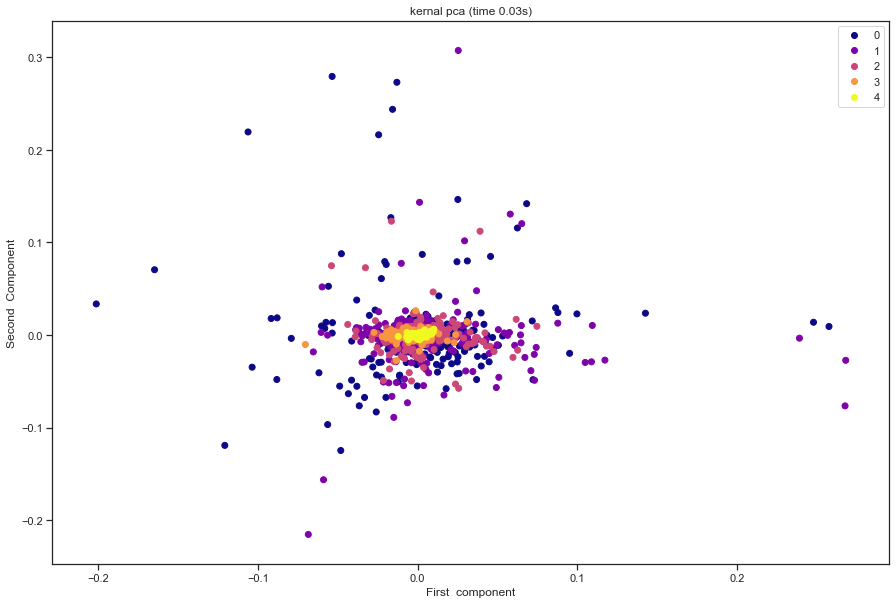

In [107]:
# Scatter plot for kernal pca

plt.figure(figsize=(15,10))
start = timeit.default_timer()
t0 = time()
classes=['0','1','2','3','4']
scatter = plt.scatter(kpca_transformed[:,0],kpca_transformed[:,1],c=data['gnd'],cmap='plasma')
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.xlabel('First  component')
plt.ylabel('Second  Component')
stop = timeit.default_timer()
plt.title("kernal pca (time %.2fs)" %(time() - t0))
print('Time: ', stop - start)
plt.show()

# Isomap

In [108]:
# Isomap
isomap = Isomap(n_components=2)
isomap_transformed = isomap.fit_transform(data)
isomap_transformed.shape

(2066, 2)

Time:  0.02316313800002945


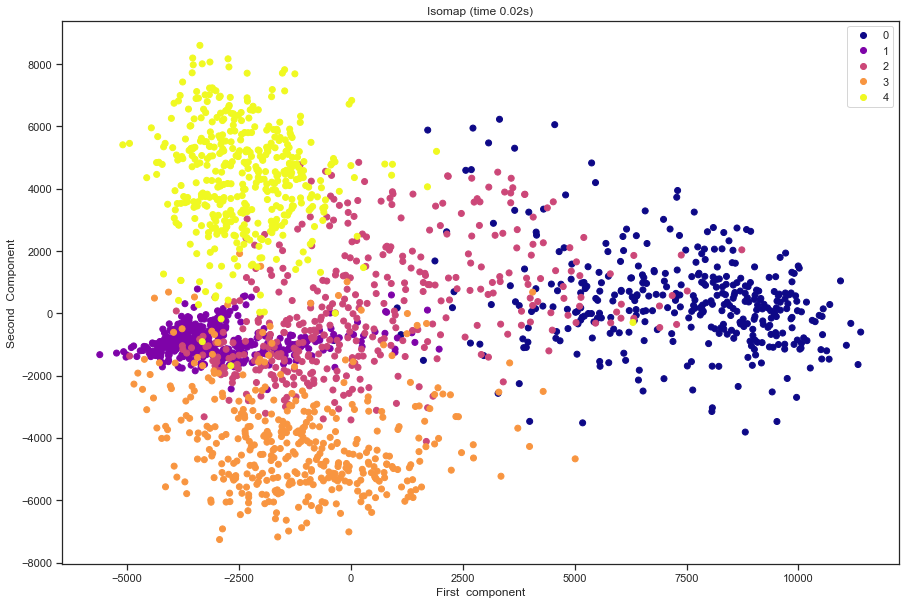

In [109]:
# Scatter plot for Isomap
plt.figure(figsize=(15,10))
t1 = time()
start = timeit.default_timer()
classes=['0','1','2','3','4']
scatter = plt.scatter(isomap_transformed[:,0],isomap_transformed[:,1],c=data['gnd'],cmap='plasma')
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.xlabel('First  component')
plt.ylabel('Second  Component')
stop = timeit.default_timer()
plt.title("Isomap (time %.2fs)" %(time() - t1))
print('Time: ', stop - start)
plt.show()

In [110]:
X = data.drop(["gnd"],1)
y = data["gnd"]

In [111]:
X.shape

(2066, 784)

In [112]:
y.shape

(2066,)

In [113]:
n_samples, n_features = X.shape

In [114]:
data['gnd'].value_counts()

1    454
4    431
2    417
3    398
0    366
Name: gnd, dtype: int64

# Locally Linear Embedding (LLE)

In [115]:
# Locally Linear Embedding (LLE)

lle = LocallyLinearEmbedding(n_components=2,random_state=42)
lle_transformed = lle.fit_transform(data)
lle_transformed.shape

(2066, 2)

Time:  0.022690268000019387


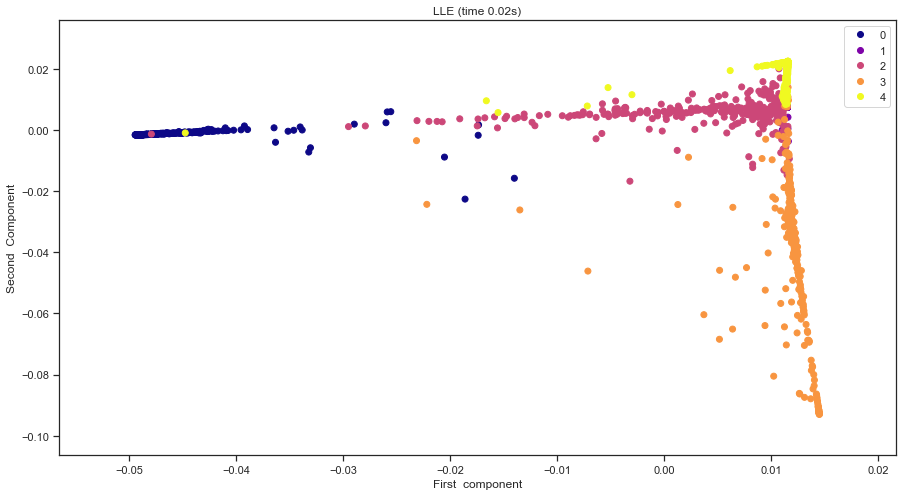

In [116]:
# Scatter plot for LLE
plt.figure(figsize=(15,8))
t2 = time()
start = timeit.default_timer()
classes=['0','1','2','3','4']
scatter = plt.scatter(lle_transformed[:,0],lle_transformed[:,1],c=data['gnd'],cmap='plasma')
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.xlabel('First  component')
plt.ylabel('Second  Component')
stop = timeit.default_timer()
plt.title("LLE (time %.2fs)" %(time() - t2))
print('Time: ', stop - start)
plt.show()

# Laplacian Eigenmap

In [117]:
#Laplacian Eigenmap
lem = SpectralEmbedding(n_components=2,random_state=42)
lem_transform = lem.fit_transform(data)
lem_transform.shape

(2066, 2)

Time:  0.026023260999977538


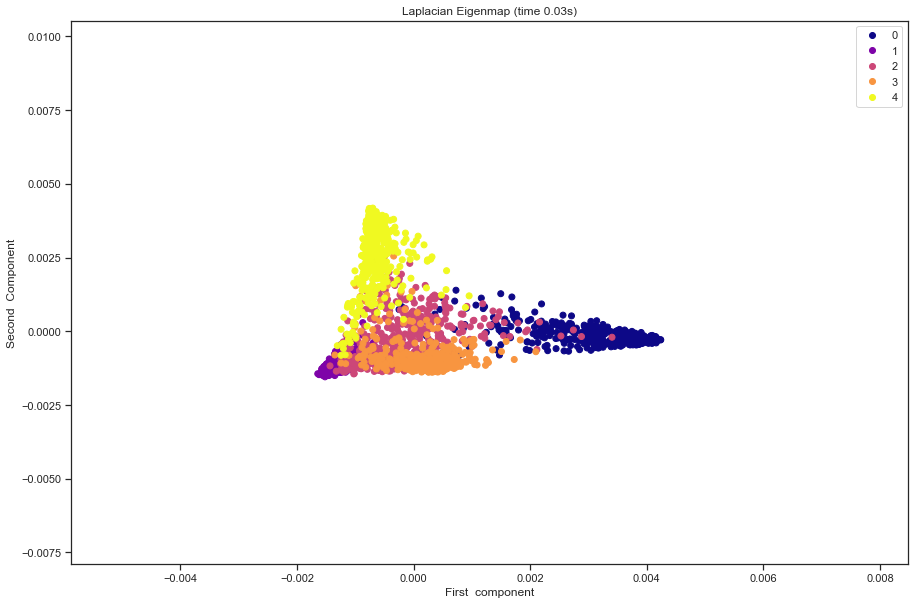

In [118]:
# Scatter plot for Laplacian Eigenmap
plt.figure(figsize=(15,10))
t3 = time()
start = timeit.default_timer()
classes=['0','1','2','3','4']
scatter = plt.scatter(lem_transform[:,0],lem_transform[:,1],c=data['gnd'],cmap='plasma')
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.xlabel('First  component')
plt.ylabel('Second  Component')
stop = timeit.default_timer()
plt.title("Laplacian Eigenmap (time %.2fs)" %(time() - t3))
print('Time: ', stop - start)
plt.show()

# tSNE

In [119]:
# t-SNE
tsne = TSNE(n_components=2,random_state=42)
tsne_transform = tsne.fit_transform(data)
tsne_transform.shape

(2066, 2)

Time:  0.02659195199998976


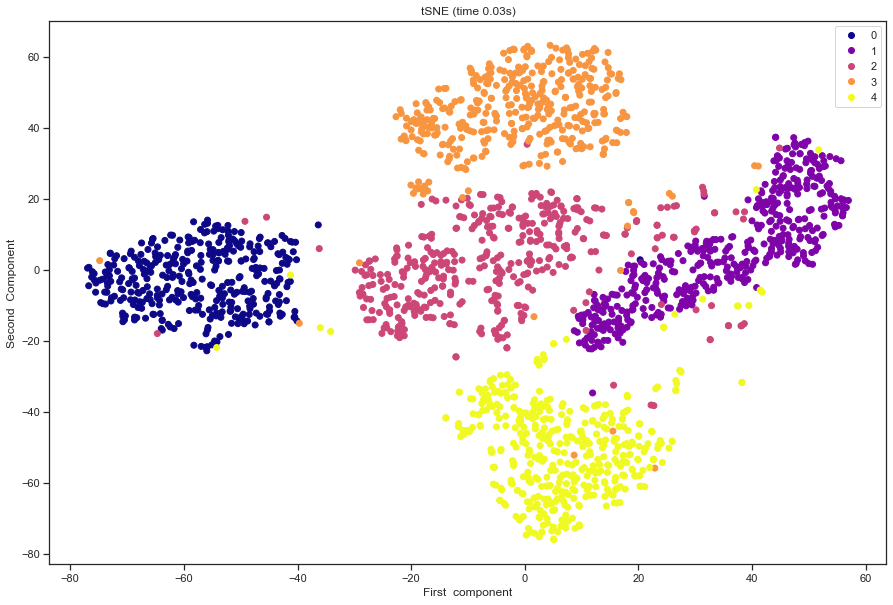

In [120]:
#Scatter plot for tSNE pca
plt.figure(figsize=(15,10))
t4 = time()
start = timeit.default_timer()
classes=['0','1','2','3','4']
scatter = plt.scatter(tsne_transform[:,0],tsne_transform[:,1],c=data['gnd'],cmap='plasma')
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.xlabel('First  component')
plt.ylabel('Second  Component')
stop = timeit.default_timer()
plt.title("tSNE (time %.2fs)" %(time() - t4))
print('Time: ', stop - start)
plt.show()



## 2. Analysis


In the kernal PCA all the 4's are very well grouped together and the rest of digits(0's, 2's, 3's) are not well seperated.It preserves the variance but it cannot seperate the classes linearly that better.

Isomap attempts to preserve geodetic distances in the lower dimension. In isomap 4's and 3's compared to other digits are grouped seperately althought there are few points that are oevrlapped but all the other digits especially 1's and 2's are highly overlapped.


Locally Linear Embedding (LLE) works by first measuring how each training instance linearly relates to its closest neighbors, and then looking for a low-dimensional representation of the training set where these local relationships are best preserved . This makes it particularly good at unrolling twisted manifolds. In LLE except few overlapps all the digits are almost well seperated.

In Laplacian Eigenmap the digits are very close to each other all we can see is that only 4's and 0's are well grouped and all others kind of overlap with eachother.

In tSNE we cannot interpret cluster sizes or inter cluster distances.But we can clearly notice that all the digits((0's, 2's, 3's and 4's) are grouped together. Based on visual similarity they are grouped together.What t-SNE tries to optimize for is preserving the topology of the data.All the digits are very well seperated from each other.This look way better than PCA.If we obesrve we can clearly see that only few data point overlap.We can write if conditions and seperate the all the digits by looking at the tsne plot.

### For 0's: ### 

Comparing all the algorithms 0's are well seperated in LLE and tSNE. Although, in Laplacian Eigenmap though 0's are seperated there are lots of datapoints that are overlapped.

### For 1's: ###

Comparing all the algorithms 1's are well seperated in LLE and tSNE. In all other algorithms 1's are highly overlapped.

### For 2's :###

Comparing all the algorithms 2's are well seperated in LLE and tSNE. In all other algorithms 1's are highly overlapped.

### For 3's: ###

3's are well seperated in LLE and tSNE. Isomp also well seperates tSNE but most of the data points are overlapped with other digits

### For 4's: ###

4's are almost well seperated by all the algorithms but comparitively there are very less overlapping in tSNE. 

### Overall Comparision of all the Algorithms: ###

From all the above analysis it is very clear that LLE and tSNE worked much better for the overall classification. Comparing both LLE and tSNE:

1. With respect to compuation time tSNE took more time to compute compared to LLE but was able to classify better.
2. With respect to the classification both performed equally better but with very much less overlappings between the digits tSNE outperformed LLE.
3. Based on the nature of both algorithms, tSNE is best because based on visual similarity they are grouped together.What t-SNE tries to optimize for is preserving the topology of the data. Whereas, LLE works by first measuring how each training instance linearly relates to its closest neighbors, and then looking for a low-dimensional representation of the training set where these local relationships are best preserved. It does not work better if there is too much noise in the data

##### From the above three obesrvations its clear that tSNE is the best algorithm for this dataset. ####

